In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing, decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model.stochastic_gradient import SGDClassifier

In [3]:
# Read and import data
data = pd.read_csv('breastcancerdata.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Check the columns in the raw data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#Check the kind of variables in the raw data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
#deleting the "id" column
data.drop("id",axis=1,inplace=True)
#deleting the "Unnamed: 32" column
data.drop("Unnamed: 32",axis=1,inplace=True) 

In [7]:
#Check variables type after deleting the ones we are not using
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [8]:
#counting the diagnosis variable
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#Transform classifying variable into numeric variable [0,1] and add a column
data.loc[data['diagnosis'] == 'M', 'Diagclass'] = 1
data.loc[data['diagnosis'] == 'B', 'Diagclass'] = 0

#Check dataset
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagclass
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [10]:
#Dataset with new classifying variable "Diagclass" and withouth the diagnosis column
data.drop("diagnosis",axis=1,inplace=True)

In [11]:
#counting the diagnosis variable
data.Diagclass.value_counts()

0.0    357
1.0    212
Name: Diagclass, dtype: int64

In [12]:
#UPsample the minority class 

# Separate majority and minority classes
Diagclass_majority = data[data.Diagclass==0]
Diagclass_minority = data[data.Diagclass==1]
 
# Downsample Diaclass majority
Diagclass_majority_downsampled = resample(Diagclass_majority, replace=False, n_samples=212, random_state=123) 
 
# Combine majority class with downsampled najority class
data1 = pd.concat([Diagclass_majority_downsampled, Diagclass_minority])
 
# Display new class counts
data1.Diagclass.value_counts()

1.0    212
0.0    212
Name: Diagclass, dtype: int64

In [13]:
#Define predictors and predicted variables

X = data1.drop('Diagclass', axis = 1)
Y = data1['Diagclass']

In [14]:
#Preprocess and scale data
names = X.columns
X1 = pd.DataFrame(preprocessing.scale(X), columns = names)
X1.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.956598,-0.958038,-0.913282,-0.872491,-0.969602,-0.000376,-0.006668,-0.697853,-0.088861,1.356285,...,-1.024784,-1.188043,-0.967787,-0.882992,-1.047159,0.046622,0.012035,-0.645890,-1.247672,1.032811
1,-1.583078,-0.897986,-1.485759,-1.261459,-0.202170,0.228499,-0.101747,-0.806465,-1.886917,1.234636,...,-1.539214,-1.487627,-1.428643,-1.176236,-0.721886,-0.513025,-0.682571,-1.291279,-2.019485,-0.409368


***PCA Analysis***

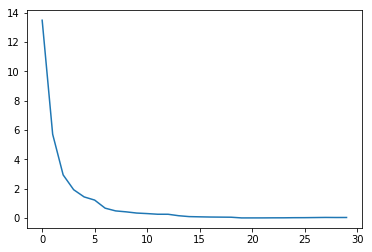

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  6.14751572e-01   2.06951967e-01   9.27501027e-02   3.87369266e-02
   2.01461419e-02   1.16794352e-02   5.99447302e-03   2.83201672e-03
   1.98332083e-03   1.37275536e-03   9.57200397e-04   8.51675019e-04
   3.88770210e-04   2.98866290e-04   1.08971366e-04   5.21596739e-05
   4.29142907e-05   3.18389467e-05   2.26298702e-05   1.45550946e-05
   1.16946836e-05   1.00308463e-05   3.98949098e-06   3.47502492e-06
   1.67783563e-06   7.79036138e-07   4.58220614e-08   1.19299345e-08
   2.68822775e-09   1.38496983e-32]


In [16]:
# Build up the correlation mtrix
Z = X1
correlation_matrix = Z.corr()

#Eigenvectores & Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

sklearn_pca = PCA(n_components=len(Z.columns))
Y_sklearn = sklearn_pca.fit_transform(correlation_matrix)

#From the Scree plot.

plt.plot(eig_vals)
plt.show()

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

In [17]:
#PCA features

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X1)

# Create a PCA object from Scree plot the number of components is 3
pca = decomposition.PCA(n_components=3)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

# Create a new dataframe with the new features

XPCA = pd.DataFrame(X_std_pca)
XPCA.head()

,0,1,2
0,-1.003006,3.481583,2.415757
1,-2.537136,3.404853,3.962812
2,-4.211706,-1.580275,1.245082
3,-4.484037,1.242662,0.422837
4,-2.740544,0.808732,-1.005692


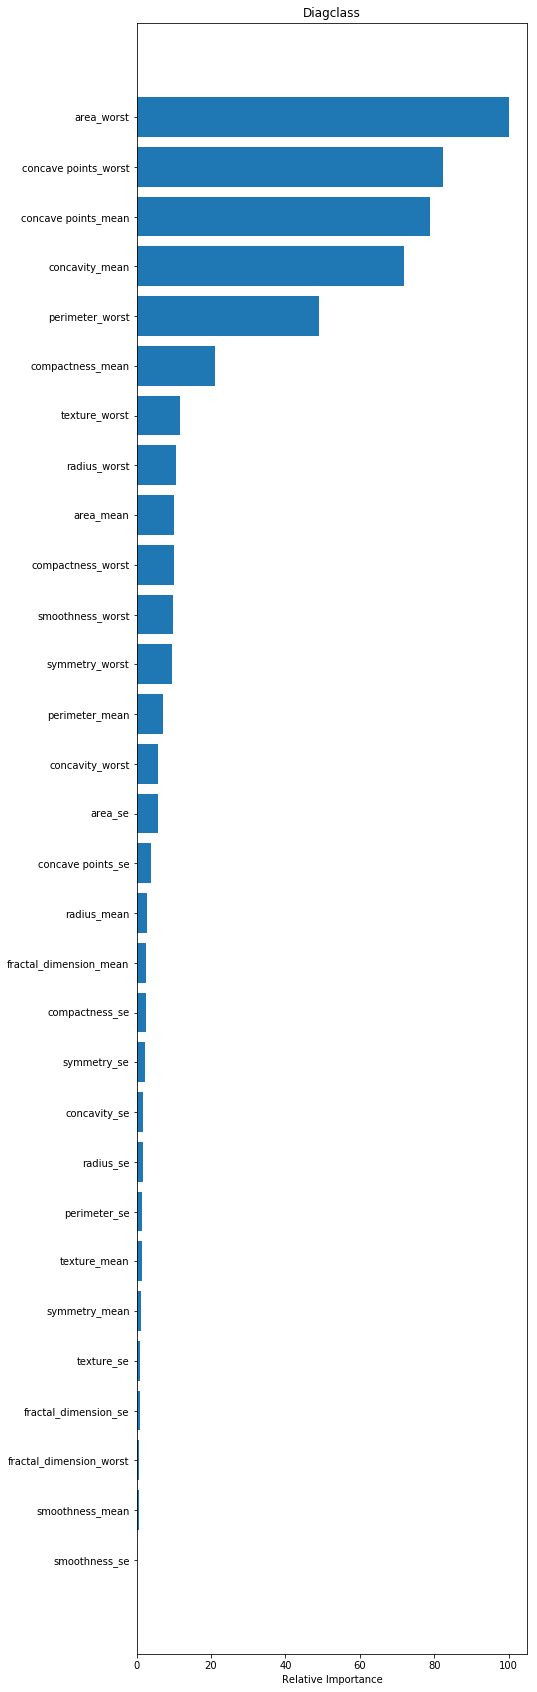

In [18]:
#Calculate Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X1, Y)

#Define feature importance
feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Diagclass')
plt.show()

In [19]:
#Feature Selection. Scores for the most relevant features (should we start with the one that has more explanatory power)

# feature extraction
test = SelectKBest()
fit = test.fit(X1, Y)

#Identify features with highest score from a predictive perspective (for all programs)
names2 = X1.columns
Bestfeatures = pd.DataFrame(fit.scores_, index = names2)
Bestfeatures.columns = ['Best Features']
Bestfeatures.sort_values(by=['Best Features'], ascending=False)

,Best Features
concave points_worst,778.324989
perimeter_worst,597.008511
concave points_mean,590.535896
radius_worst,565.973575
perimeter_mean,477.235649
radius_mean,443.106946
concavity_worst,430.025210
concavity_mean,408.012843
area_worst,407.719036
area_mean,365.352404


In [20]:
# create the RFE model and select features

#From PCA analyis the number of components is 3

nfeatures = 3
lr = LogisticRegression()
rfe = RFE(lr,nfeatures)
fit = rfe.fit(X1,Y)

# summarize the selection of the features

result_RFE = pd.DataFrame(list(zip(X1.head(0), rfe.ranking_, rfe.support_)),columns=['Features','Ranking','Support'] )
result_RFE.sort_values('Ranking')

,Features,Ranking,Support
22,perimeter_worst,1,True
20,radius_worst,1,True
27,concave points_worst,1,True
10,radius_se,2,False
21,texture_worst,3,False
23,area_worst,4,False
24,smoothness_worst,5,False
0,radius_mean,6,False
26,concavity_worst,7,False
13,area_se,8,False


***Feature Selection***

In [21]:
#View all the predictors to make the feature selection
X1.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
#Feature Selection using Random Forest
X3 = X1[['perimeter_worst', 'area_worst', 'concave points_mean', 'concavity_mean','radius_worst','perimeter_mean',
'concavity_worst', 'compactness_mean','concave points_worst','compactness_worst']]

#Feature Selection using RFE & PCA
X2 = X1[['radius_worst','concave points_worst','perimeter_worst']]

In [23]:
#Split the data into training and testing datasets. Split: 70/30; train/test

X_train, X_test, y_train, y_test = train_test_split(X2,Y, test_size=0.3, random_state=123)

#Initiating the cross validation generator, N splits = 5

kf = KFold(5)

***Logistic Regression***

In [24]:
# Initialize and fit the model.

lr = LogisticRegression()

#Tune parameters

k1 = np.arange(20)+1
k2 = ['l1','l2']

parameters = {'C': k1,
             'penalty':k2
             }

#Fit parameters

lr1 = GridSearchCV(lr, param_grid=parameters, cv=kf)

#Fit the tunned classifier in the traiing space
lr1.fit(X_train, y_train)

#Print the best parameters
print(lr1.best_params_)    

{'C': 1, 'penalty': 'l2'}


In [25]:
#Have a raw idea of the accuracy of each of the feeatures selection carried out with different methodologies
lr1.fit(XPCA, Y)

# Predict on test set
predPCA_y = lr1.predict(XPCA)

print((
    'PCA accuracy: {}\n'
    'RFE accuracy: {}\n'
    'FI accuracy: {}\n'
).format(cross_val_score(lr1,XPCA,Y,cv=kf).mean(),cross_val_score(lr,X2,Y,cv=kf).mean(),cross_val_score(lr,X3,Y,cv=kf).mean()))

PCA accuracy: 0.9387114845938374
RFE accuracy: 0.9268627450980393
FI accuracy: 0.9245658263305323



In [26]:
#Fit on Test set
lr1.fit(X_test, y_test)

predtest_y = lr1.predict(X_test)

In [27]:
#Evaluate model (test set)
target_names = ['0.0', '1.0']
print(classification_report(y_test, predtest_y, target_names=target_names))

confusion = confusion_matrix(y_test, predtest_y)
print(confusion)

# Accuracy tables.
table_test = pd.crosstab(y_test, predtest_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']


acclr1 = cross_val_score(lr1,X_test,y_test,cv=kf).mean()
acclr1pca = cross_val_score(lr1,XPCA,Y,cv=kf).mean()

print((
    'Logistic Regression accuracy: {}\n'
    'Logistic Regression accuracy PCA: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(acclr1,acclr1pca,test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95        64
        1.0       0.97      0.94      0.95        64

avg / total       0.95      0.95      0.95       128

[[62  2]
 [ 4 60]]
Logistic Regression accuracy: 0.9452307692307691
Logistic Regression accuracy PCA: 0.9387114845938374
Percent Type I errors: 0.015625
Percent Type II errors: 0.03125




***Naive Bayes***

In [28]:
# Initialize and fit the model.

lb = BernoulliNB()

#Tune parameters

k1 = np.arange(10)+1

parameters = {'alpha': k1}

#Fit parameters

lb1 = GridSearchCV(lb, param_grid=parameters, cv=kf)

#Fit the tunned classifier in the traiing space
lb1.fit(X_train, y_train)

#Print the best parameters
print(lb1.best_params_) 

{'alpha': 1}


In [29]:
# Predict on the test data set

lb1.fit(X_test, y_test)

# Predict on training set
predtestlb_y = lb1.predict(X_test)

In [30]:
#Evaluation of the model (testing)

target_names = ['0.0', '1.0']
print(classification_report(y_test, predtestlb_y, target_names=target_names))

confusion = confusion_matrix(y_test, predtestlb_y)
print(confusion)

# Accuracy tables.
table_test = pd.crosstab(y_test, predtestlb_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

acclb1 = cross_val_score(lb1,X_test,y_test,cv=kf).mean()
acclb1pca = cross_val_score(lb1,XPCA, Y,cv=kf).mean()

print((
    'Naive Bayes accuracy: {}\n'
    'Naive Bayes accuracy PCA: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(acclb1,acclb1pca,test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

        0.0       0.85      0.98      0.91        64
        1.0       0.98      0.83      0.90        64

avg / total       0.92      0.91      0.91       128

[[63  1]
 [11 53]]
Naive Bayes accuracy: 0.9064615384615384
Naive Bayes accuracy PCA: 0.9031932773109244
Percent Type I errors: 0.0078125
Percent Type II errors: 0.0859375




***KNN***

In [31]:
# Initialize and fit the model
KNN = KNeighborsClassifier(n_jobs=-1)

#Create range of values to fit parameters

k1 = [11,13,15,17,19,21]
k2 = [40,50,60]
k3 = ['uniform', 'distance']
k4 = ['auto', 'ball_tree','kd_tree','brute']

parameters = {'n_neighbors': k1,
          'leaf_size': k2,
          'weights':k3,
          'algorithm':k4}

#Fit parameters

clf = GridSearchCV(KNN, param_grid=parameters, cv=kf)

#Fit the tunned model
clf.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:", clf.best_params_)

Best Hyper Parameters: {'weights': 'uniform', 'n_neighbors': 15, 'algorithm': 'auto', 'leaf_size': 40}


In [32]:
#Initialize the model on test dataset

clf.fit(X_test, y_test)

# Predict on test dataset

predtest3_y = clf.predict(X_test)

In [33]:
#Evaluate model on the test set
target_names = ['0.0', '1.0']
print(classification_report(y_test, predtest3_y, target_names=target_names))

#Create confusion matrix
confusion = confusion_matrix(y_test, predtest3_y)
print(confusion)

# Accuracy tables.
table_test = pd.crosstab(y_test, predtest3_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

accclf = cross_val_score(clf,X_test,y_test,cv=kf).mean()
accclfpca = cross_val_score(clf,XPCA,Y,cv=kf).mean()

#Print Results
print((
    'KNN accuracy: {}\n'
    'KNN accuracy PCA: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(accclf,accclfpca,test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

        0.0       0.94      0.95      0.95        64
        1.0       0.95      0.94      0.94        64

avg / total       0.95      0.95      0.95       128

[[61  3]
 [ 4 60]]
KNN accuracy: 0.9375384615384614
KNN accuracy PCA: 0.917422969187675
Percent Type I errors: 0.0234375
Percent Type II errors: 0.03125




***Random Forest***

In [34]:
# Initialize the model

rf = RandomForestClassifier(n_jobs = -1)

#Create range of values to fit parameters

k1 = [20,100,300]

parameters = {'n_estimators':k1}

#Fit parameters

rf1 = GridSearchCV(rf, param_grid=parameters, cv=kf)

#Fit the tunned model
rf1.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:", rf1.best_params_)

Best Hyper Parameters: {'n_estimators': 100}


In [35]:
#Fit in test dataset
rf1.fit(X_test, y_test)

#Predict on test dataset
predtestrf_y = rf1.predict(X_test)

In [36]:
#Test Scores
target_names = ['0', '1']
print(classification_report(y_test, predtestrf_y, target_names=target_names))
cnf = confusion_matrix(y_test, predtestrf_y)
print(cnf)

table_test = pd.crosstab(y_test, predtestrf_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

accrf1 = cross_val_score(rf1,X_test,y_test,cv=kf).mean()
accrf1pca = cross_val_score(rf1,XPCA,Y,cv=kf).mean()

print((
    'Random Forest accuracy:{}\n'
    'Random Forest accuracy PCA:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(accrf1,accrf1pca,test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        64
          1       1.00      0.98      0.99        64

avg / total       0.99      0.99      0.99       128

[[64  0]
 [ 1 63]]
Random Forest accuracy:0.9295384615384616
Random Forest accuracy PCA:0.9340056022408962
Percent Type I errors: 0.0
Percent Type II errors: 0.0078125


***Decision Tree***

In [37]:
# Train model
OTM = DecisionTreeClassifier()

#Create range of values to fit parameters


k1 = ['auto', 'sqrt', 'log2']


parameters = {'max_features': k1
         }

#Fit parameters

OTM1 = GridSearchCV(OTM, param_grid=parameters, cv=kf)

#Fit the tunned model
OTM1.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:", OTM1.best_params_)

Best Hyper Parameters: {'max_features': 'auto'}


In [38]:
#Fit on test dataset
OTM1.fit(X_test, y_test)

#Predict parameters on test dataset

predtestrf1_y = OTM1.predict(X_test)

In [39]:
#Test Scores
target_names = ['0', '1']
print(classification_report(y_test, predtestrf1_y, target_names=target_names))
cnf = confusion_matrix(y_test, predtestrf1_y)
print(cnf)

table_test = pd.crosstab(y_test, predtestrf1_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

OTM1acc = cross_val_score(OTM1,X_test,y_test,cv=kf).mean()
OTM1accpca = cross_val_score(OTM1,XPCA,Y,cv=kf).mean()

print((
    'Decision Tree accuracy:{}\n'
    'Decision Tree accuracy PCA:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(OTM1acc,OTM1accpca, test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00        64

avg / total       1.00      1.00      1.00       128

[[64  0]
 [ 0 64]]
Decision Tree accuracy:0.8898461538461537
Decision Tree accuracy PCA:0.8844257703081233
Percent Type I errors: 0.0
Percent Type II errors: 0.0


***SVC***

In [40]:
# Train model
svc = SVC()

#Create range of values to fit parameters
k1 = np.arange(20)+1
k2 =  ['linear','rbf']


parameters = {'C': k1, 
          'kernel': k2}

#Fit parameters

svc1 = GridSearchCV(svc, param_grid=parameters, cv=kf)

#Fit the tunned model
svc1.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:", svc1.best_params_)

Best Hyper Parameters: {'kernel': 'linear', 'C': 3}


In [41]:
#Fit tunned model on Test set
svc1.fit(X_test, y_test)

# Predict on training set
predtestsvc_y = svc1.predict(X_test)

In [42]:
#Test Scores
target_names = ['0.0', '1.0']
print(classification_report(y_test, predtestsvc_y, target_names=target_names))
cnf = confusion_matrix(y_test, predtestsvc_y)
print(cnf)

table_test = pd.crosstab(y_test, predtestsvc_y, margins=True)

accsvc1 = cross_val_score(svc1,X_test,y_test,cv=kf).mean()
accsvc1pca = cross_val_score(svc1,XPCA,Y,cv=kf).mean()

print((
    'SVC accuracy:{}\n'
    'SVC accuracy PCA:{}\n'
).format(accsvc1,accsvc1pca))

             precision    recall  f1-score   support

        0.0       0.94      0.95      0.95        64
        1.0       0.95      0.94      0.94        64

avg / total       0.95      0.95      0.95       128

[[61  3]
 [ 4 60]]
SVC accuracy:0.9375384615384617
SVC accuracy PCA:0.9127450980392157



***Gradient Boosting***

In [43]:
# Train model

GBC = GradientBoostingClassifier()

k1 = ['deviance','exponential']
k2 = np.arange(100)+1
k5 = ['friedman_mse','mse','mae']

parameters = {'loss': k1,
             'n_estimators': k2,
             'criterion': k5}

#Fit parameters

GBC1 = GridSearchCV(GBC, param_grid=parameters, cv=kf)

#Fit the tunned model
GBC1.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:", GBC1.best_params_)

Best Hyper Parameters: {'criterion': 'mae', 'loss': 'deviance', 'n_estimators': 88}


In [44]:
#Fit on the test set
GBC1.fit(X_test, y_test)

# Predict on test set

predtestgb_y = GBC1.predict(X_test)

In [45]:
#Test Scores
target_names = ['0', '1']
print(classification_report(y_test, predtestgb_y, target_names=target_names))
cnf = confusion_matrix(y_test, predtestgb_y)
print(cnf)

table_test = pd.crosstab(y_test, predtestgb_y, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

accGBC1 = cross_val_score(GBC1,X_test,y_test,cv=kf).mean()
accGBC1pca = cross_val_score(GBC1,XPCA,Y,cv=kf).mean()

print((
    'Gradient Boosting accuracy:{}\n'
    'Gradient Boosting accuracy PCA:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(accGBC1,accGBC1pca,test_tI_errors, test_tII_errors))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00        64

avg / total       1.00      1.00      1.00       128

[[64  0]
 [ 0 64]]
Gradient Boosting accuracy:0.9052307692307693
Gradient Boosting accuracy PCA:0.9175350140056023
Percent Type I errors: 0.0
Percent Type II errors: 0.0


***Conclusion***

Based on the breast Cancer Diagnostic dataset with 569 entries a model has been built to predict based on the most relevant features obtained if a tumor is benign or malign. In this case we have used classifiers to build the models and the hyperparameters have been tuned on the training set, accounting for 70% of all the data and test on the remaining 30%. As a result, all the models tested have an accuracy that goes from 89% in the worst-case scenario up to 95% in the best case. The models used have been logistic regression, KNN, SVC, Random Forest, Naïve Bayes (Bernouilli, Gradient Boosting and Decision Tree). All hyperparameters of the models and the models have been tested using cross validation with five folds.
The first step has been to create and select the features that will be the predictors of the model and to build the output variable as a [0,1] variable. In the latter, the dataset has been resampled to balance the number of outputs in each class. For the feature selection, Random forest best features, select best and recursive feature elimination have been used. Additionally is has been compared to the number of features that a PCA analysis gives as meaningful for the model. In the case of the feature selection models used, the features selected using random forest have been narrowed down to the ones produced by the recursive feature elimination using as the maximum number of features the number given by the PCA analysis equating to 3.
The selected features are: 'radius_worst','concave points_worst','perimeter_worst'.

In [54]:
#Summary of accuracy of different models:

print(('Accuracy of each model: \n'
     'Logistic Regression:{:.{prec}f} \n'
      'KNN: {:.{prec}f} \n' 
       'SVC: {:.{prec}f} \n'
     'Random Forest: {:.{prec}f} \n'
      'Naive Bayes:{:.{prec}f} \n' 
       'Gradient Boosting: {:.{prec}f} \n'
        'Decision Tree: {:.{prec}f} \n'
      ).format(acclr1,accclf,accsvc1,accrf1,acclb1,accGBC1,OTM1acc,prec=4))

Accuracy of each model: 
Logistic Regression:0.9452 
KNN: 0.9375 
SVC: 0.9375 
Random Forest: 0.9295 
Naive Bayes:0.9065 
Gradient Boosting: 0.9052 
Decision Tree: 0.8898 

